# Data Cleaning in Pandas - Recap

## Introduction

In this section you saw how to wrangle and clean data in Pandas! This will be a baseline skill that you will use consistently in your work whether it's doing sanity checks, cleaning messy data or transforming raw datasets into useful aggregates and views. Having an understanding of the format of your data is essential to critically thinking about how you can manipulate and shape it into new and interesting forms.


## Lambda functions

We started out by introducing lambda functions. These are quick throw away functions that you can write on the fly. They're very useful for transforming a column feature. For example, you might want to extract the day from a date.

In [1]:
import pandas as pd
dates = pd.Series(['12-01-2017', '12-02-2017', '12-03-2017', '12-04-2017'])
dates.map(lambda x: x.split('-')[1])

0    01
1    02
2    03
3    04
dtype: object

## Combining DataFrames

You can combine dataframes by merging them (joining data by a common field) or concatenating them (appending data at the beginning or end).

In [2]:
df1 = pd.DataFrame(dates)
df2 = pd.DataFrame(['12-05-2017', '12-06-2017', '12-07-2017'])
pd.concat([df1, df2])

,0
0,12-01-2017
1,12-02-2017
2,12-03-2017
3,12-04-2017
0,12-05-2017
1,12-06-2017
2,12-07-2017


## Grouping and aggregating

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,NaN,S


In [4]:
grouped = df.groupby(['Pclass', 'Sex'])['Age'].mean().reset_index()
grouped.head()

,Pclass,Sex,Age
0,1,female,34.098291
1,1,male,38.287799
2,2,female,26.338992
3,2,male,31.630340
4,3,female,25.677973


## Pivot tables

In [5]:
pivoted = grouped.pivot(index='Pclass', columns = 'Sex', values='Age')
pivoted

Sex,female,male
Pclass,,
1,34.098291,38.287799
2,26.338992,31.630340
3,25.677973,25.757624
?,32.011356,32.862597


## Graphing

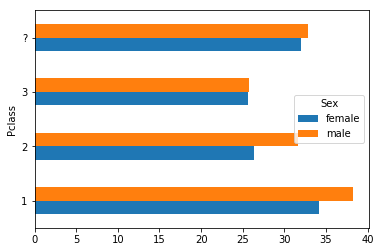

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
pivoted.plot(kind='barh')

## Missing data

In [7]:
print('Top 5 Values before:\n', df['Cabin'].value_counts(normalize=True).reset_index()[:5])
# Not a useful means of imputing in most cases, but a simple example to recap
df.Cabin = df['Cabin'].fillna(value='?')
print('Top 5 Values after:\n', df.Cabin.value_counts(normalize=True).reset_index()[:5])

Top 5 Values before:
          index     Cabin
0          B41  0.013289
1          A20  0.013289
2         E121  0.013289
3          D15  0.011628
4  C23 C25 C27  0.011628
Top 5 Values after:
   index     Cabin
0     ?  0.567218
1  E121  0.005751
2   B41  0.005751
3   A20  0.005751
4   D15  0.005032


## Summary

In this lesson, you started practicing essential ETL skills that you will use throughout your data work to transform and wrangle data into useful forms.

In [8]:
print("Fin")

Fin
